## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [4]:
%pylab inline
#data_dir = "./Data/Weather/"
data_dir = '~/Desktop/UCSD_BigData_2016/Homeworks/HW-3'

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [19]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  4769k      0  0:00:16  0:00:16 --:--:-- 5484k


### Get the statistics from the Pickle File

In [20]:
import pickle
#STAT,STAT_description=pickle.load(open(data_dir+'/STAT_TAVG_RANGE.pickle','r'))
STAT,STAT_description=pickle.load(open('STAT.pickle','r'))

In [21]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [22]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [24]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '/home/sadat/Desktop/UCSD_BigData_2016/Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print meas
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
TMIN
mean:44.531018 TMIN
std:109.933072 TMIN
low1000:-350.000000 TMIN
low100:-245.000000 TMIN
high100:239.000000 TMIN
high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
TOBS
mean:113.582223 TOBS
std:119.255224 TOBS
low1000:-267.000000 TOBS
low100:-167.000000 TOBS
high100:339.000000 TOBS
high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
TMAX
mean:175.823101 TMAX
std:123.742076 TMAX
low1000:-233.000000 TMAX
low100:-122.000000 TMAX
high100:383.000000 TMAX
high1000:433.000000
   	   SNOW = Snowfall (mm)
SNOW
mean:2.126900 SNOW
std:24.160393 SNOW
low1000:0.000000 SNOW
low100:0.000000 SNOW
high100:76.000000 SNOW
high1000:254.000000
	   SNWD = Snow depth (mm)
SNWD
mean:21.454498 SNWD
std:123.727039 SNWD
low1000:0.000000 SNWD
low100:0.000000 SNWD
high100:508.000000 SNWD
high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
PRCP
mean:24.277398 PRCP
st

### Script for plotting yearly plots 

In [50]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

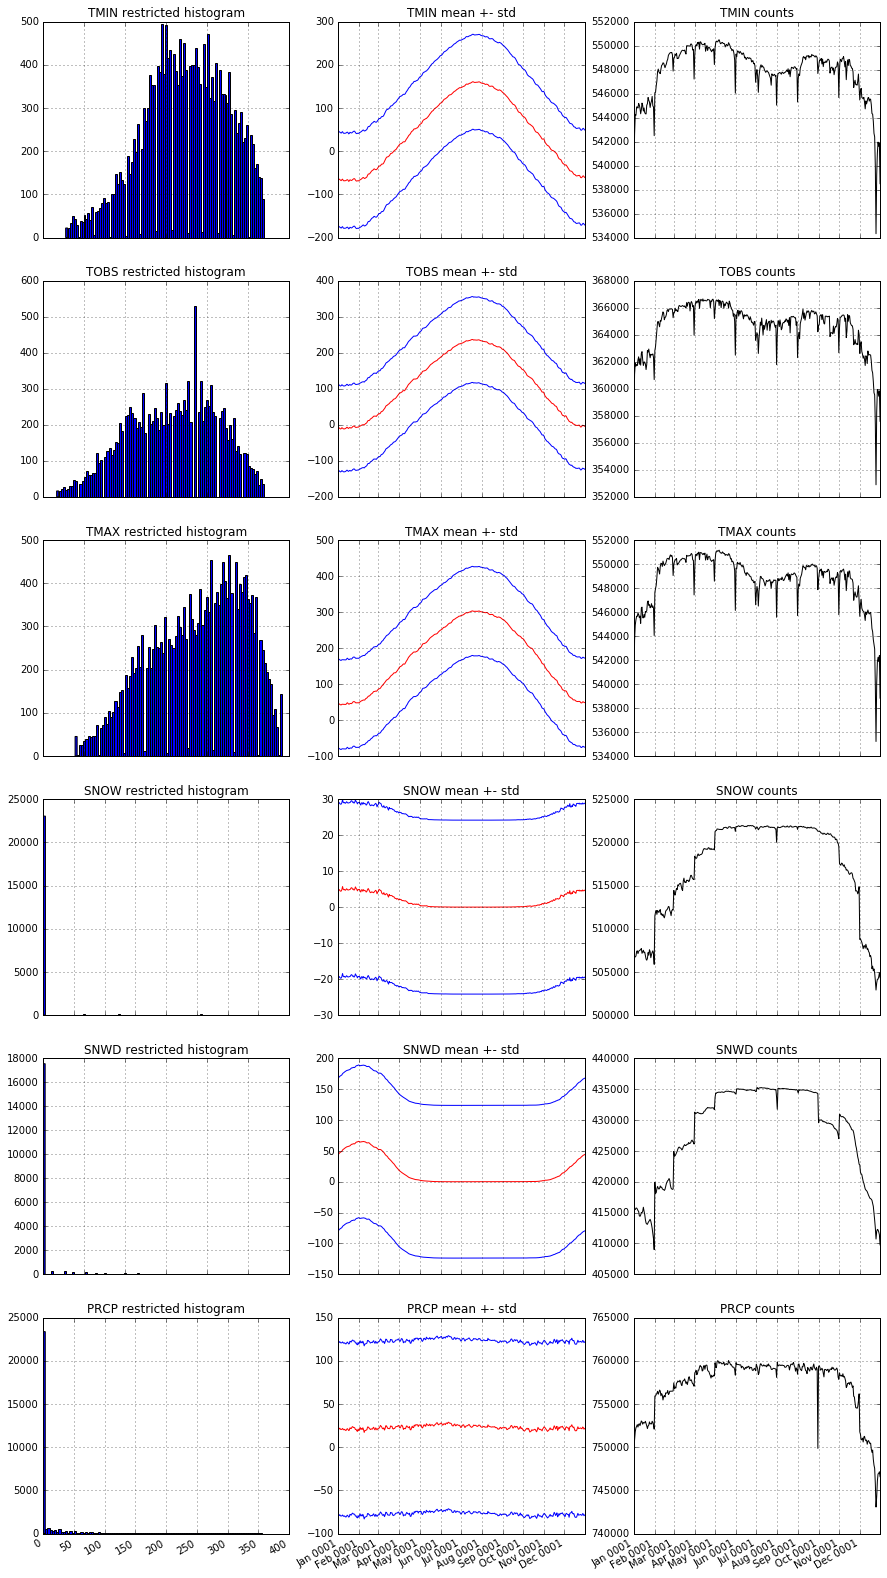

In [75]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    cond1=(STAT[meas]['SortedVals']<=STAT[meas]['high100'])
    cond2=(STAT[meas]['SortedVals']>=STAT[meas]['low100'])
    data = STAT[meas]['SortedVals'][cond1&cond2]
    plt.hist(data, bins=100)
    plt.title(meas+' restricted histogram')
    plt.grid()
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean']+STAT[meas]['std'],c='b')
    YearlyPlots(STAT[meas]['Mean'],c='r')
    YearlyPlots(STAT[meas]['Mean']-STAT[meas]['std'],ttl=meas+' mean +- std',c='b')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    yearday=[i for i in range(1,366)]
    plot_date(yearday,STAT[meas]['NE'], 'k-', )
    plt.title(meas+' counts')
    fig.autofmt_xdate()
    plt.grid()

### Plot the Number of measurements recorded each day for TMAX

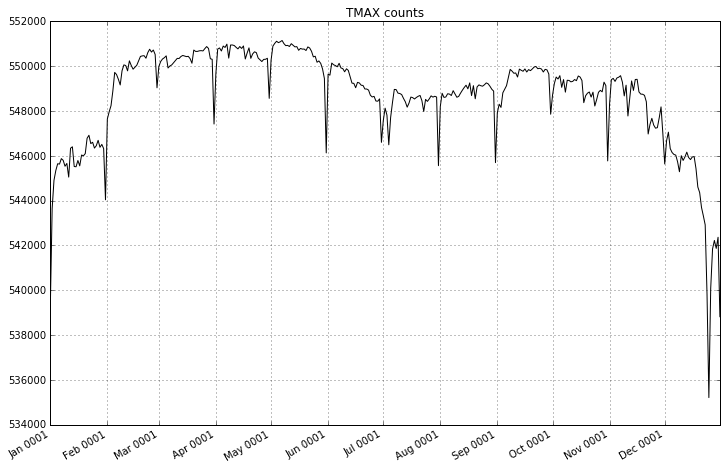

In [74]:
## Your code here
fig=figure(figsize=(12,8))
yearday=[i for i in range(1,366)]
plot_date(yearday,STAT['TMAX']['NE'], 'k-', )
plt.title('TMAX counts')
fig.autofmt_xdate()
plt.grid()

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

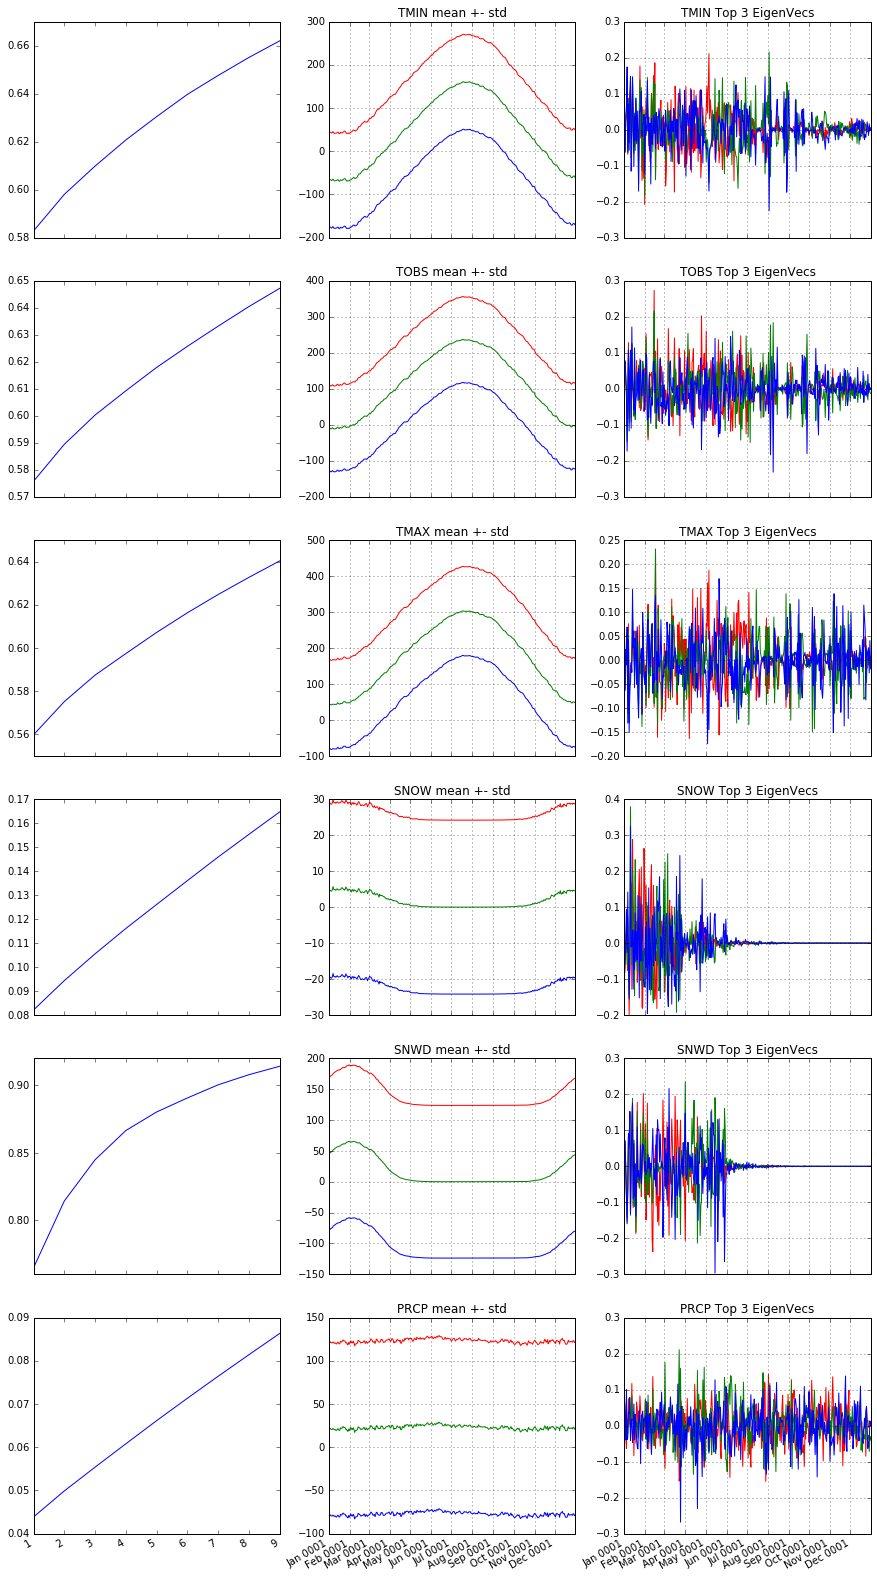

In [120]:
fig=figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    ve_list = []
    for i in range(1,10):
        eigval = STAT[meas]['eigval']
        variance_explained = np.sum(eigval[0:i+1])/np.sum(eigval)
        ve_list.append(variance_explained)
    plt.plot(np.linspace(1,9,9), ve_list, 'b')
        
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean']+STAT[meas]['std'], c='r')
    YearlyPlots(STAT[meas]['Mean'], c='g')
    YearlyPlots(STAT[meas]['Mean']-STAT[meas]['std'],ttl=meas+' mean +- std', c='b')    
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    yearday=[i for i in range(1,366)]
    plot_date(yearday,STAT[meas]['eigvec'][0], 'r-', )
    plot_date(yearday,STAT[meas]['eigvec'][1], 'g-', )
    plot_date(yearday,STAT[meas]['eigvec'][2], 'b-', )
    plt.title(meas+' Top 3 EigenVecs')
    fig.autofmt_xdate()
    plt.grid()